In [1]:
import tensorflow as tf

print(tf.__version__)

2.10.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset = pd.read_csv(r"D:\Data Science\Deep Learning\Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
# Feature engineering

geography = pd.get_dummies(X['Geography'], drop_first= True)
gender = pd.get_dummies(X['Gender'], drop_first= True)

In [8]:
## concate this varibale with dataframe
X=X.drop(['Gender', 'Geography'], axis=1)

In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
X=pd.concat([X,geography,gender], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
# Splitting dataset into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

In [12]:
# feature scalling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [15]:
X_train.shape

(8000, 11)

In [16]:
X_test.shape

(2000, 11)

In [17]:
## Part 2 now lets create ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [18]:
# Lets initialize the ANN
classifier = Sequential()


In [19]:
# adding input layer

classifier.add(Dense(units=11, activation='relu'))

In [20]:
# adding the first hidden layer

classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [21]:
# adding the second hidden layer

classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [22]:
# adding the output layer

classifier.add(Dense(1, activation='sigmoid'))

In [23]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
opt

In [24]:
classifier.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Early stopping
import tensorflow as tf


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [26]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)
model_history 

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4763 - accuracy: 0.7968 - val_loss: 0.4207 - val_accuracy: 0.7993
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4301 - accuracy: 0.8069 - val_loss: 0.3943 - val_accuracy: 0.8266
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4077 - accuracy: 0.8209 - val_loss: 0.3783 - val_accuracy: 0.8432
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8261 - val_loss: 0.3769 - val_accuracy: 0.8474
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3939 - accuracy: 0.8298 - val_loss: 0.3741 - val_accuracy: 0.8304
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3929 - accuracy: 0.8306 - val_loss: 0.3638 - val_accuracy: 0.8493
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3883 - accuracy: 0.8330 - val_loss: 0.3742 - val_accuracy:

In [27]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

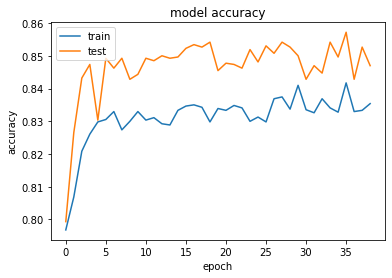

In [28]:
# Summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test',], loc='upper left')
plt.show()

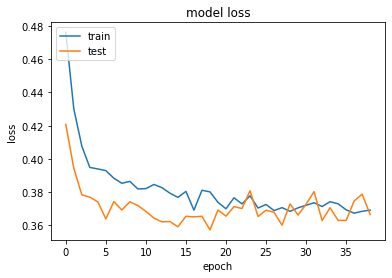

In [29]:
# Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test',], loc='upper left')
plt.show()

In [30]:
# part 3 - Making the predictions and evaluating the model

# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [31]:
# make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[1561,   34],
       [ 241,  164]], dtype=int64)

In [32]:
# calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8625

In [33]:
# get the weights
classifier.get_weights()

[array([[ 0.10179972,  0.33161563, -0.39587876, -0.75517225,  0.59217864,
          0.17352527,  0.5303904 , -0.62109447, -1.1309326 , -0.13012786,
         -0.3704342 ],
        [ 1.82567   ,  2.1289377 ,  4.045206  ,  1.6521134 , -0.90673673,
          2.3741384 ,  1.5215461 , -1.4374568 ,  0.7572271 , -0.01276446,
          0.5458295 ],
        [ 0.44026548,  0.2266803 , -0.1247951 ,  0.12201194,  0.20287392,
          0.20479918,  0.6844311 ,  1.0525882 ,  0.9393301 ,  0.9422592 ,
         -0.18327403],
        [ 0.17130767,  0.902187  ,  1.2698888 , -2.4106612 , -1.3019602 ,
         -0.96250194, -1.227244  , -1.2365866 ,  1.4516782 , -1.8967172 ,
          0.3444618 ],
        [-0.96160907,  2.1746225 , -0.40612918, -3.3688645 ,  1.5061811 ,
          0.09284332, -1.772881  ,  0.5962827 ,  1.641215  ,  0.8752217 ,
          3.378461  ],
        [ 0.29190388, -0.66711295, -0.22149195, -0.10480998,  0.62415177,
         -0.2426562 ,  0.0428248 , -0.34190914, -0.11099102, -1.0170984